In [ ]:
# 필요한 라이브러리 가져오기
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 데이터셋 로드
train_data = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/mtcars_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/mtcars_test.csv')

# 데이터 준비
X_train = train_data[['cyl']]
y_train = train_data['mpg']

X_test = test_data[['cyl']]
y_test = test_data['mpg']

# 독립변수에 상수 추가 (statsmodels에 필요)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 선형 회귀 모형 생성
model = sm.OLS(y_train, X_train_const).fit()

# 모형 요약 출력
print(model.summary())

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_const)

# 모형 평가
mse = mean_squared_error(y_test, y_pred)
print(f'평균 제곱 오차: {mse}')




                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     53.05
Date:                Tue, 28 May 2024   Prob (F-statistic):           2.70e-07
Time:                        07:23:53   Log-Likelihood:                -61.833
No. Observations:                  24   AIC:                             127.7
Df Residuals:                      22   BIC:                             130.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3481      2.500     14.939      0.0

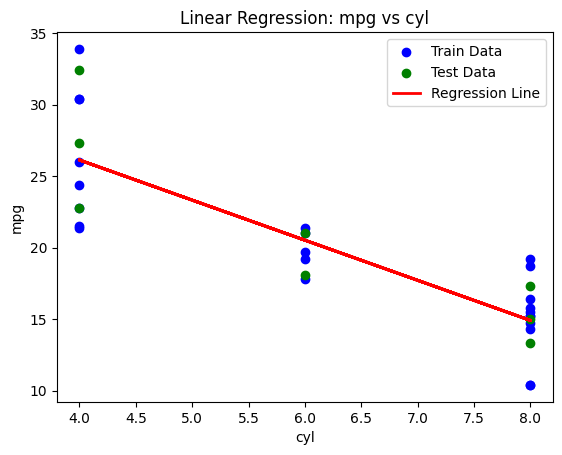

In [ ]:
# 원본 데이터 점
plt.scatter(X_train['cyl'], y_train, color='blue', label='Train Data')
plt.scatter(X_test['cyl'], y_test, color='green', label='Test Data')

# 회귀선 그리기
plt.plot(X_train['cyl'], model.predict(X_train_const), color='red', linewidth=2, label='Regression Line')

# 그래프 레이블 추가
plt.xlabel('cyl')
plt.ylabel('mpg')
plt.title('Linear Regression: mpg vs cyl')
plt.legend()
plt.show()
